master
0% [############################# ] 100% | ETA: 00:00:00
Stat                 master
-------------------  ----------
Start                2003-07-19
End                  2014-09-20
Risk-free rate       0.00%

Total Return         20.55%
Daily Sharpe         0.23
Daily Sortino        0.31
CAGR                 1.69%
Max Drawdown         -29.70%
Calmar Ratio         0.06

MTD                  1.11%
3m                   0.50%
6m                   -0.98%
YTD                  -3.31%
1Y                   1.43%
3Y (ann.)            5.16%
5Y (ann.)            1.02%
10Y (ann.)           1.23%
Since Incep. (ann.)  1.69%

Daily Sharpe         0.23
Daily Sortino        0.31
Daily Mean (ann.)    1.83%
Daily Vol (ann.)     7.94%
Daily Skew           -0.15
Daily Kurt           3.85
Best Day             3.55%
Worst Day            -2.73%

Monthly Sharpe       0.24
Monthly Sortino      0.30
Monthly Mean (ann.)  2.06%
Monthly Vol (ann.)   8.73%
Monthly Skew         -0.59
Monthly Kurt         1.73
B

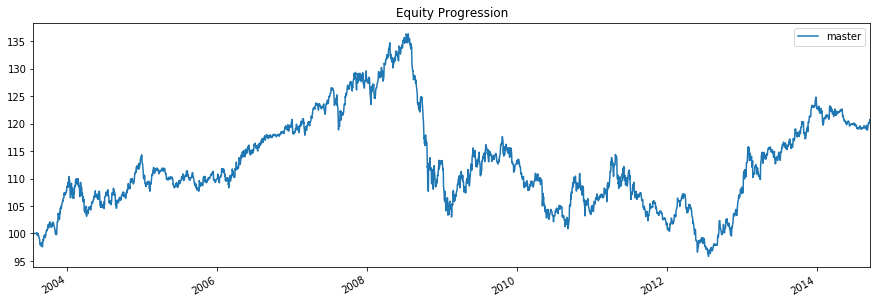

In [1]:
import bt

import matplotlib.pyplot as plt
%matplotlib inline

data = bt.get('eurusd,eurjpy,usdjpy', start='1027890000', end='1317330000')

mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                    ['eurjpy', 'usdjpy'])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other is a Strategy.
master = bt.Strategy('master', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [mom_s, 'eurusd'])

# create the backtest and run it
t = bt.Backtest(master, data)

#print 'First Calculation'
r = bt.run(t)

#print 'First Graph'
r.plot()

#print 'First Output Table'
print 
r.display()